### KNN with Iris Dataset
### Author: Payal Patel

#### Import Libraries & Dataset

In [1]:
## Import Libraries ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

In [2]:
## Change Working Directory ##
os.chdir('C:/Users/19197/Desktop/github/iris')

In [3]:
## Import Dataset ##
iris = pd.read_csv('iris.csv')

#### Data Cleaning

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
# rename columns
newcols={"Sepal.Length":"Sepal Length", "Sepal.Width":"Sepal Width",
        "Petal.Length": "Petal Length", "Petal.Width":"Petal Width"} 
  
iris.rename(columns=newcols,inplace=True) 
  
print(iris.head()) 

   Sepal Length  Sepal Width  Petal Length  Petal Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# check missing values
iris.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

#### Exploratory Data Analysis: [Iris-EDA](https://github.com/payalnpatel/ML-with-Python/blob/main/Iris/Iris-EDA.ipynb)

#### Preprocessing

In [7]:
# split features/label
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values

In [8]:
X[1]

array([4.9, 3. , 1.4, 0.2])

In [9]:
y[1]

'setosa'

#### Train/Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### Scaling / Standardization

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Training/Prediction, for k = 5

In [12]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Model Evaluation, for k = 5

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 14]], dtype=int64)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.93      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [16]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.78 %.


#### Hyperparameter tuning - determine best k value using cross-validation 

In [17]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

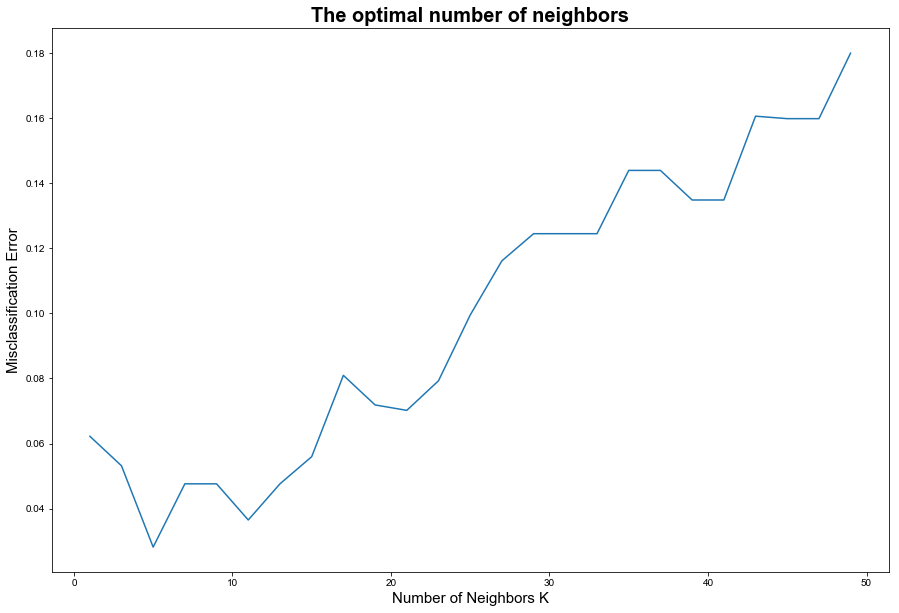

In [18]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [19]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 5.


#### Training/Prediction, for best_k

In [20]:
classifier = KNeighborsClassifier(n_neighbors=best_k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Model Evaluation, for best_k

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 14]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.93      0.97        15

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [24]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 97.78 %.
